# FILTRO DE KALMAN. ESTIMACIÓN DE LA TRAYECTORIA DE UN VEHÍCULO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

p = np.loadtxt('posicion.dat')[:,1:4]
v = np.loadtxt('velocidad.dat')[:,1:4]
a = np.loadtxt('aceleracion.dat')[:,1:4]



def kalman_filter(X_0, P_0, X_med, A, C, Q, R):
    amt_data = X_med.shape[1]
    X_nn = np.zeros(shape=(amt_data, len(X_0))).T
    X_nn[:, 0] = X_0
    P_nn = []
    P_nn.append(P_0)
    for i in range(0, amt_data-1):
        X_nn1 = np.matmul(A, X_nn[:, i])
        P_nn1 = np.matmul(np.matmul(A, P_nn[i]), A.T) + Q

        Kn = np.matmul(P_nn1, np.matmul(C.T, np.linalg.inv(np.matmul(np.matmul(C, P_nn1), C.T) + R)))
        X_nn[:, i + 1] = X_nn1 + np.matmul(Kn, X_med[:, i+1] - np.matmul(C, X_nn1))
        P_nn.append(np.matmul(np.identity(9) - np.matmul(Kn, C), P_nn1))
    return X_nn

In [2]:
# Valores Iniciales
X_0 = np.array([10.7533, 36.6777, -45.1769, 1.1009, -17.0, 35.7418, -5.7247, 3.4268, 5.2774]).T# shape(9,1)
P_0 = np.diag(np.array([100, 100, 100, 1, 1, 1, 0.01, 0.01, 0.01])) # shape(9,9)
X = np.concatenate((p, v, a), axis=1) # matriz X con los valores reales

# Matrices del sistema
h = np.ones(shape=X.shape[1]).reshape(3,3)
matrix_0 = np.zeros(shape=X.shape[1]).reshape(3,3)
row_0 = np.concatenate((np.identity(3), matrix_0, matrix_0))
row_1 = np.concatenate((np.identity(3) * h, np.identity(3), matrix_0))
row_2 = np.concatenate((np.identity(3) * (h ** 2)/2, np.identity(3) * h, np.identity(3)))
A = np.concatenate((row_0, row_1, row_2), axis=1)
B = 0
C = np.concatenate((np.eye(3), np.zeros(shape=(3,3)), np.zeros(shape=(3,3)))).T
Q = 0.3 * np.identity(9)
R = np.diag(np.array([100, 100, 100]))

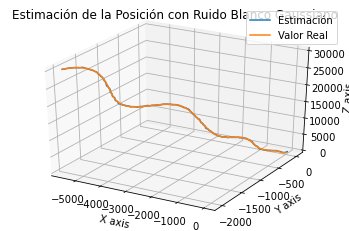

MSE Posición: 463.77
MSE Velocidad: 176.59
MSE Aceleración: 36.64


In [3]:
# Ejercicio 1
# Se mide la posicion afectada por ruido blanco (gaussiano) de 10m de desvio estandar.
# Es decir que se le debe agregar ruido blanco con una distribucion gaussiana con
# media cero y desvio 10.

# Mediciones
X_med = p
noise = np.random.normal(0, 10, size=X_med.shape[0] * X_med.shape[1]) # ruido blanco de media 0 y std 10
X_med = (X_med + noise.reshape(X_med.shape[0], X_med.shape[1])).T
X_nn = kalman_filter(X_0, P_0, X_med, A, C, Q, R)
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Estimación de la Posición con Ruido Blanco Gaussiano')
ax.plot(X_nn[0, :351], X_nn[1, :351], zs=X_nn[2, :351], label='Estimación')
ax.plot(p.T[0, :], p.T[1, :], zs=p.T[2, :], label='Valor Real')
ax.legend()
plt.show()
MSE_1_p = np.sum(np.sqrt(np.sum((X.T[0:3, :] - X_nn[0:3, :]) ** 2, axis=0)))/(X.shape[1])
MSE_1_v = np.sum(np.sqrt(np.sum((X.T[3:6, :] - X_nn[3:6, :]) ** 2, axis=0)))/(X.shape[1])
MSE_1_a = np.sum(np.sqrt(np.sum((X.T[6:9, :] - X_nn[6:9, :]) ** 2, axis=0)))/(X.shape[1])
print('MSE Posición:', np.round(MSE_1_p,2))
print('MSE Velocidad:', np.round(MSE_1_v,2))
print('MSE Aceleración:', np.round(MSE_1_a,2))

# Errores de estimación por tiempo
error_est_p_1 = np.sqrt(np.sum((X.T[0:3, :] - X_nn[0:3, :]) ** 2, axis=0))
error_est_v_1 = np.sqrt(np.sum((X.T[3:6, :] - X_nn[3:6, :]) ** 2, axis=0))
error_est_a_1 = np.sqrt(np.sum((X.T[6:9, :] - X_nn[6:9, :]) ** 2, axis=0))
# Errores de estimación acumulados
error_acum_p_1 = np.add.accumulate(error_est_p_1)
error_acum_v_1 = np.add.accumulate(error_est_v_1)
error_acum_a_1 = np.add.accumulate(error_est_a_1)


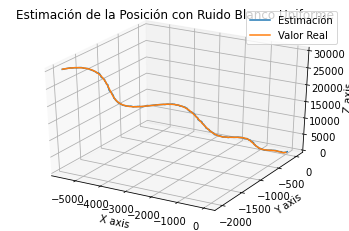

MSE Posición: 452.53
MSE Velocidad: 177.36
MSE Aceleración: 37.21


In [4]:
# Ejercicio 2
#Se mide la posicion afectada por ruido blanco (uniforme) de 10m de desvio estandar.
#Similar al item anterior. La idea es comparar con el item anterior. Analizar si hubo
#algun cambio.

# Mediciones
X_med = p
noise = np.random.uniform(-np.sqrt(1200)/2, np.sqrt(1200)/2, size=X_med.shape[0] * X_med.shape[1]) # ruido blanco de media 0 y std 10
X_med = (X_med + noise.reshape(X_med.shape[0], X_med.shape[1])).T
X_nn = kalman_filter(X_0, P_0, X_med, A, C, Q, R)
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111, projection='3d')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.set_title('Estimación de la Posición con Ruido Blanco Uniforme')
ax2.plot(X_nn[0, :351], X_nn[1, :351], zs=X_nn[2, :351], label='Estimación')
ax2.plot(p.T[0, :], p.T[1, :], zs=p.T[2, :], label='Valor Real')
ax2.legend()
plt.show()

# Errores de estimación por tiempo
error_est_p_2 = np.sqrt(np.sum((X.T[0:3, :] - X_nn[0:3, :]) ** 2, axis=0))
error_est_v_2 = np.sqrt(np.sum((X.T[3:6, :] - X_nn[3:6, :]) ** 2, axis=0))
error_est_a_2 = np.sqrt(np.sum((X.T[6:9, :] - X_nn[6:9, :]) ** 2, axis=0))
# Errores de estimación acumulados
error_acum_p_2 = np.add.accumulate(error_est_p_2)
error_acum_v_2 = np.add.accumulate(error_est_v_2)
error_acum_a_2 = np.add.accumulate(error_est_a_2)


MSE_2_p = np.sum(np.sqrt(np.sum((X.T[0:3, :] - X_nn[0:3, :]) ** 2, axis=0)))/(X.shape[1])
MSE_2_v = np.sum(np.sqrt(np.sum((X.T[3:6, :] - X_nn[3:6, :]) ** 2, axis=0)))/(X.shape[1])
MSE_2_a = np.sum(np.sqrt(np.sum((X.T[6:9, :] - X_nn[6:9, :]) ** 2, axis=0)))/(X.shape[1])
print('MSE Posición:', np.round(MSE_2_p,2))
print('MSE Velocidad:', np.round(MSE_2_v,2))
print('MSE Aceleración:', np.round(MSE_2_a,2))

# Se observa de la figura siguiente y de los valores de MSE, una leve mejoría del modelo con ruido blanco gaussiano
# respecto del modelo con ruido blanco uniforme. De todas maneras la estimación sigue siendo buena.

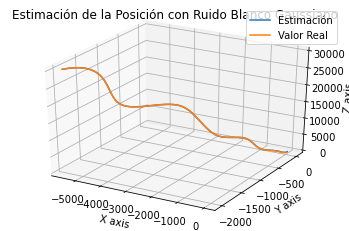

MSE Posición: 137.37
MSE Velocidad: 1.42
MSE Aceleración: 3.61


In [5]:
# Ejercicio 3
# Se mide la posicion y la velocidad afectadas por ruido blanco (gaussiano) de 10m
# y 0.2m/s de desvios respectivamente. Analizar si ejora la estimacion.
R = np.diag(np.array([100, 100, 100, 0.04, 0.04, 0.04]))
C_row0 = np.concatenate((np.eye(3), np.zeros(shape=(3,3)), np.zeros(shape=(3,3))))
C_row1 = np.concatenate((np.zeros(shape=(3,3)), np.eye(3), np.zeros(shape=(3,3))))
C = np.concatenate((C_row0, C_row1), axis=1).T
# Medicion de posicion
X_med_p = p
noise_p = np.random.normal(0, 10, size=X_med_p.shape[0] * X_med_p.shape[1]) # ruido blanco de media 0 y std 10
X_med_p = (X_med_p + noise_p.reshape(X_med_p.shape[0], X_med_p.shape[1]))

# Medicion de velocidad
X_med_v = v
noise_v = np.random.normal(0, 0.02, size=X_med_v.shape[0] * X_med_v.shape[1]) # ruido blanco de media 0 y std 0.02
X_med_v = (X_med_v + noise_v.reshape(X_med_v.shape[0], X_med_v.shape[1]))

# Matriz de mediciones
X_med = np.concatenate((X_med_p, X_med_v), axis=1).T

X_nn = kalman_filter(X_0, P_0, X_med, A, C, Q, R)
fig3 = plt.figure(3)
ax3 = fig3.add_subplot(111, projection='3d')
ax3.set_xlabel('X axis')
ax3.set_ylabel('Y axis')
ax3.set_zlabel('Z axis')
ax3.set_title('Estimación de la Posición con Ruido Blanco Gaussiano')
ax3.plot(X_nn[0, :351], X_nn[1, :351], zs=X_nn[2, :351], label='Estimación')
ax3.plot(p.T[0, :], p.T[1, :], zs=p.T[2, :], label='Valor Real')
ax3.legend()
plt.show()
MSE_3_p = np.sum(np.sqrt(np.sum((X.T[0:3, :] - X_nn[0:3, :]) ** 2, axis=0)))/(X.shape[1])
MSE_3_v = np.sum(np.sqrt(np.sum((X.T[3:6, :] - X_nn[3:6, :]) ** 2, axis=0)))/(X.shape[1])
MSE_3_a = np.sum(np.sqrt(np.sum((X.T[6:9, :] - X_nn[6:9, :]) ** 2, axis=0)))/(X.shape[1])
print('MSE Posición:', np.round(MSE_3_p,2))
print('MSE Velocidad:', np.round(MSE_3_v,2))
print('MSE Aceleración:', np.round(MSE_3_a,2))

# Errores de estimación por tiempo
error_est_p_3 = np.sqrt(np.sum((X.T[0:3, :] - X_nn[0:3, :]) ** 2, axis=0))
error_est_v_3 = np.sqrt(np.sum((X.T[3:6, :] - X_nn[3:6, :]) ** 2, axis=0))
error_est_a_3 = np.sqrt(np.sum((X.T[6:9, :] - X_nn[6:9, :]) ** 2, axis=0))
# Errores de estimación acumulados
error_acum_p_3 = np.add.accumulate(error_est_p_3)
error_acum_v_3 = np.add.accumulate(error_est_v_3)
error_acum_a_3 = np.add.accumulate(error_est_a_3)
# Al calcular el MSE se observa una clara mejoría gracias a la medición de la velocidad.
# La actualización de las variables de estado ya no sólo depende de la medición de la posición sino también de la velocidad,
# lo cual agrega información extra.

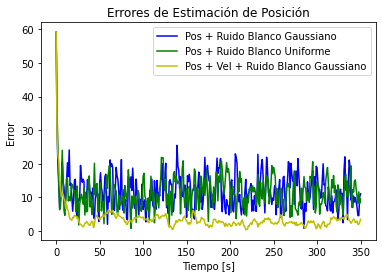

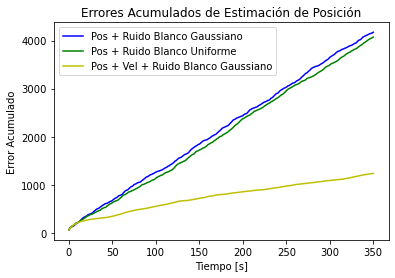

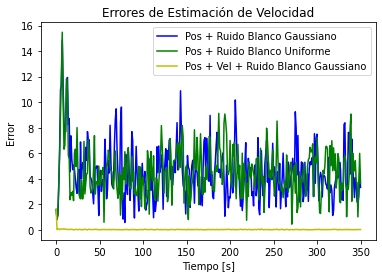

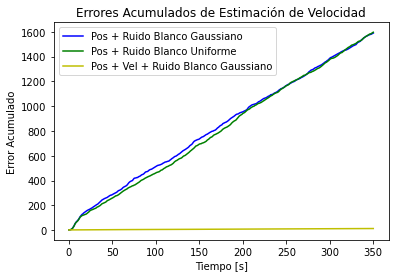

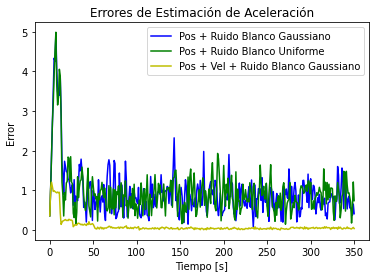

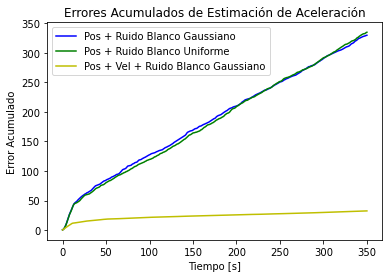

In [6]:
# Plots errores de estimacion

plot1 = plt.figure(4)
plt.ylabel('Error ')
plt.xlabel('Tiempo [s]')
x_plot = np.arange(0, len(error_est_p_2))
plt.title('Errores de Estimación de Posición')
plt.plot(x_plot, error_est_p_1, color='b', label=f'Pos + Ruido Blanco Gaussiano')
plt.plot(x_plot, error_est_p_2, color='g', label=f'Pos + Ruido Blanco Uniforme')
plt.plot(x_plot, error_est_p_3, color='y', label=f'Pos + Vel + Ruido Blanco Gaussiano')
plt.legend()
plt.show()

plot1 = plt.figure(5)
plt.ylabel('Error Acumulado')
plt.xlabel('Tiempo [s]')
x_plot = np.arange(0, len(error_est_p_2))
plt.title('Errores Acumulados de Estimación de Posición')
plt.plot(x_plot, error_acum_p_1, color='b', label=f'Pos + Ruido Blanco Gaussiano')
plt.plot(x_plot, error_acum_p_2, color='g', label=f'Pos + Ruido Blanco Uniforme')
plt.plot(x_plot, error_acum_p_3, color='y', label=f'Pos + Vel + Ruido Blanco Gaussiano')
plt.legend()
plt.show()

plot1 = plt.figure(5)
plt.ylabel('Error ')
plt.xlabel('Tiempo [s]')
x_plot = np.arange(0, len(error_est_p_2))
plt.title('Errores de Estimación de Velocidad')
plt.plot(x_plot, error_est_v_1, color='b', label=f'Pos + Ruido Blanco Gaussiano')
plt.plot(x_plot, error_est_v_2, color='g', label=f'Pos + Ruido Blanco Uniforme')
plt.plot(x_plot, error_est_v_3, color='y', label=f'Pos + Vel + Ruido Blanco Gaussiano')
plt.legend()
plt.show()

plot1 = plt.figure(6)
plt.ylabel('Error Acumulado')
plt.xlabel('Tiempo [s]')
x_plot = np.arange(0, len(error_est_p_2))
plt.title('Errores Acumulados de Estimación de Velocidad')
plt.plot(x_plot, error_acum_v_1, color='b', label=f'Pos + Ruido Blanco Gaussiano')
plt.plot(x_plot, error_acum_v_2, color='g', label=f'Pos + Ruido Blanco Uniforme')
plt.plot(x_plot, error_acum_v_3, color='y', label=f'Pos + Vel + Ruido Blanco Gaussiano')
plt.legend()
plt.show()

plot1 = plt.figure(7)
plt.ylabel('Error ')
plt.xlabel('Tiempo [s]')
x_plot = np.arange(0, len(error_est_p_2))
plt.title('Errores de Estimación de Aceleración')
plt.plot(x_plot, error_est_a_1, color='b', label=f'Pos + Ruido Blanco Gaussiano')
plt.plot(x_plot, error_est_a_2, color='g', label=f'Pos + Ruido Blanco Uniforme')
plt.plot(x_plot, error_est_a_3, color='y', label=f'Pos + Vel + Ruido Blanco Gaussiano')
plt.legend()
plt.show()

plot1 = plt.figure(8)
plt.ylabel('Error Acumulado')
plt.xlabel('Tiempo [s]')
x_plot = np.arange(0, len(error_est_p_2))
plt.title('Errores Acumulados de Estimación de Aceleración')
plt.plot(x_plot, error_acum_a_1, color='b', label=f'Pos + Ruido Blanco Gaussiano')
plt.plot(x_plot, error_acum_a_2, color='g', label=f'Pos + Ruido Blanco Uniforme')
plt.plot(x_plot, error_acum_a_3, color='y', label=f'Pos + Vel + Ruido Blanco Gaussiano')
plt.legend()
plt.show()